# Import and view the dataset

In [1]:
# Import the necessary library
from ucimlrepo import fetch_ucirepo

# Fetch the dataset by ID
statlog_german_credit_data = fetch_ucirepo(id=144)

# Data (features and target)
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# Display the metadata of the dataset
print("Metadata:")
print(statlog_german_credit_data.metadata)

# Display the variable information
print("\nVariable Information:")
print(statlog_german_credit_data.variables)

# Optionally, display the first few rows of the features to inspect the data
print("\nFirst 5 rows of features:")
print(X.head())

# Check for the target distribution
print("\nTarget Distribution:")
print(y.value_counts())


Metadata:
{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form p

In [9]:
# Fetch the dataset by ID
statlog_german_credit_data = fetch_ucirepo(id=144)

# Access the variable information
variables_info = statlog_german_credit_data.variables

# Display the first few rows of the DataFrame to understand its structure
print("First 5 rows of the variable information:")
print(variables_info.head())

# Iterate through the rows of the DataFrame and print each variable's description
print("\nDataset Variables Description:\n")
for _, row in variables_info.iterrows():
    print(f"Variable: {row['name']}")
    print(f"Description: {row.get('description', 'No description available.')}")
    print(f"Type: {row['type']}")
    print(f"Possible Values: {row.get('values', 'Not applicable')}")
    print("-" * 50)

First 5 rows of the variable information:
         name     role         type demographic  \
0  Attribute1  Feature  Categorical        None   
1  Attribute2  Feature      Integer        None   
2  Attribute3  Feature  Categorical        None   
3  Attribute4  Feature  Categorical        None   
4  Attribute5  Feature      Integer        None   

                           description   units missing_values  
0  Status of existing checking account    None             no  
1                             Duration  months             no  
2                       Credit history    None             no  
3                              Purpose    None             no  
4                        Credit amount    None             no  

Dataset Variables Description:

Variable: Attribute1
Description: Status of existing checking account
Type: Categorical
Possible Values: Not applicable
--------------------------------------------------
Variable: Attribute2
Description: Duration
Type: Integer
Possib

# Inspect the distribution of Variables

Categorical Variable Distributions:

Attribute1:
Attribute1
A14    394
A11    274
A12    269
A13     63
Name: count, dtype: int64

Attribute3:
Attribute3
A32    530
A34    293
A33     88
A31     49
A30     40
Name: count, dtype: int64

Attribute4:
Attribute4
A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A44      12
A410     12
A48       9
Name: count, dtype: int64

Attribute6:
Attribute6
A61    603
A65    183
A62    103
A63     63
A64     48
Name: count, dtype: int64

Attribute7:
Attribute7
A73    339
A75    253
A74    174
A72    172
A71     62
Name: count, dtype: int64

Attribute9:
Attribute9
A93    548
A92    310
A94     92
A91     50
Name: count, dtype: int64

Attribute10:
Attribute10
A101    907
A103     52
A102     41
Name: count, dtype: int64

Attribute12:
Attribute12
A123    332
A121    282
A122    232
A124    154
Name: count, dtype: int64

Attribute14:
Attribute14
A143    814
A141    139
A142     47
Name: count, dtype: int64

Attribute15:
A

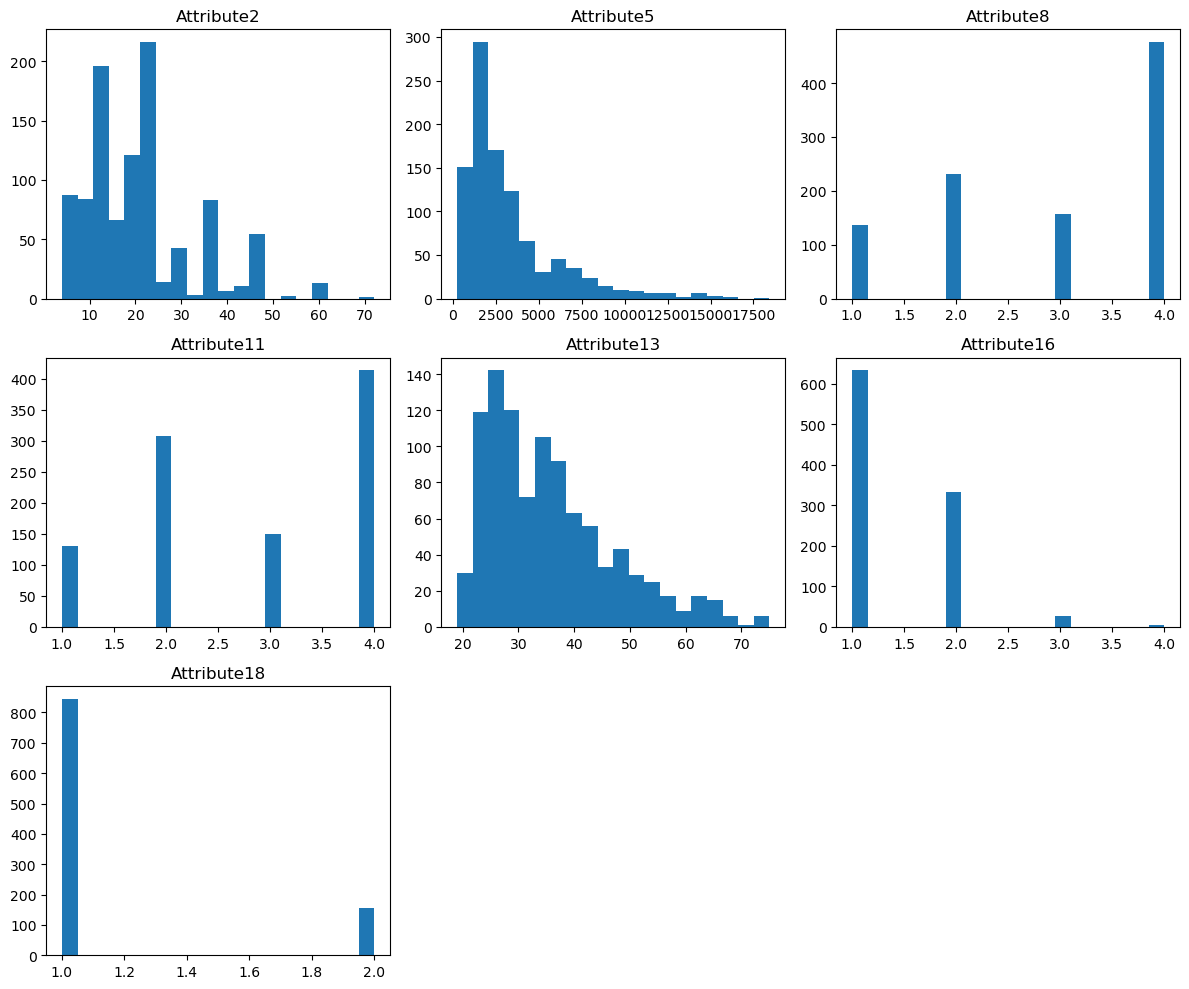


Count Plots for Categorical Variables:


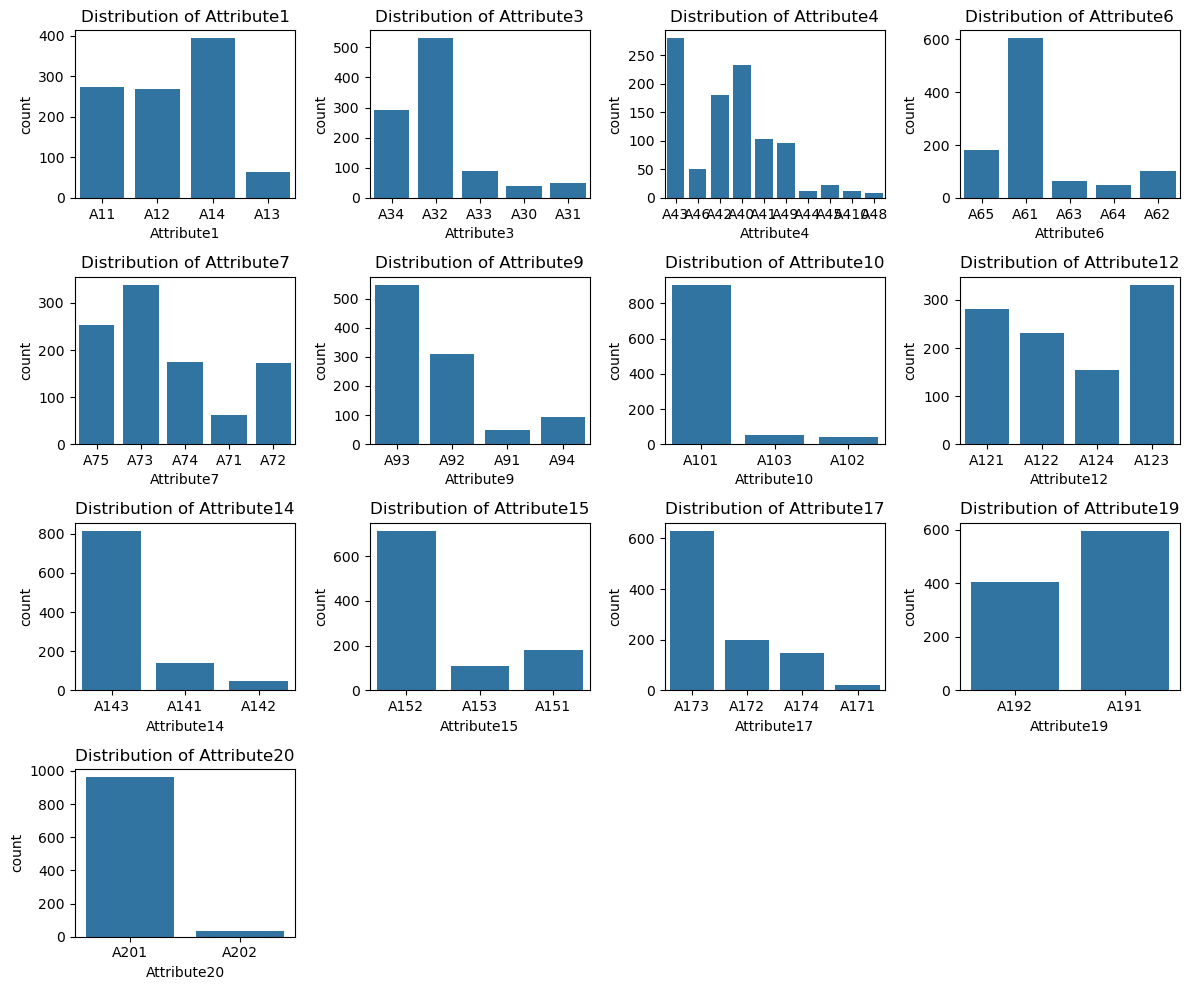

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of categorical variables
categorical_columns = [
    'Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 
    'Attribute9', 'Attribute10', 'Attribute12', 'Attribute14', 'Attribute15', 
    'Attribute17', 'Attribute19', 'Attribute20'
]

# Display value counts for categorical features
print("Categorical Variable Distributions:\n")
for col in categorical_columns:
    print(f"{col}:\n{X[col].value_counts()}\n")

# Check the distribution of numerical variables
numerical_columns = [
    'Attribute2', 'Attribute5', 'Attribute8', 'Attribute11', 'Attribute13', 
    'Attribute16', 'Attribute18'
]

# Display summary statistics for numerical features
print("\nNumerical Variable Distributions (Summary Statistics):\n")
print(X[numerical_columns].describe())

# Optionally, plot histograms to visualize distributions
print("\nHistograms for Numerical Variables:")
X[numerical_columns].hist(figsize=(12, 10), bins=20, grid=False)
plt.tight_layout()
plt.show()

# Optionally, plot count plots for categorical variables to visualize the distribution
print("\nCount Plots for Categorical Variables:")
plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=X[col])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


# How to use the Metadata?
How to Use the Metadata:
The metadata provides valuable insights that will guide the preprocessing and modeling steps:

Encoding Categorical Variables:

YWe’ll need to encode categorical variables (e.g., credit_history, purpose, housing) into numerical values.
For binary categorical variables (like telephone and foreign_worker),  use binary encoding (0/1).
For multiclass categorical variables (like status_of_existing_checking_account or credit_history),  use one-hot encoding.
Numerical Variables:

Scaling: Numerical features such as duration, credit_amount, and age will need to be scaled using a method like StandardScaler (to have a mean of 0 and standard deviation of 1).
Cost Matrix:

The cost matrix suggests that misclassifying a bad credit risk as good is more costly. This should be considered when tuning the model's parameters and during evaluation (e.g., using a weighted loss function or adjusting class weights).
Feature Types:

Based on the feature types (categorical and numerical), we can decide on the appropriate preprocessing steps:
Categorical: One-hot encoding, label encoding, or ordinal encoding.
Numerical: Scaling or normalization.


# Let's start Pre-Processing

In [20]:
type(y)

pandas.core.frame.DataFrame

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming X and y have been loaded (X = features, y = target)

# 1. Check if y is a DataFrame and extract the 'class' column
if isinstance(y, pd.DataFrame):
    y = y['class']  # Extract target variable

# 2. Convert target to binary (1 = Good Credit, 0 = Bad Credit)
y_binary = y.map({1: 1, 2: 0})

# 3. Define categorical and numerical columns
categorical_columns = [
    'Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 
    'Attribute9', 'Attribute10', 'Attribute12', 'Attribute14', 'Attribute15', 
    'Attribute17', 'Attribute19', 'Attribute20'
]

numerical_columns = [
    'Attribute2', 'Attribute5', 'Attribute8', 'Attribute11', 'Attribute13', 
    'Attribute16', 'Attribute18'
]

# 4. Split the dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# 5. Create a preprocessor for scaling numerical columns and encoding categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Scaling numerical columns
        ('cat', OneHotEncoder(drop='first'), categorical_columns)  # One-hot encoding for categorical columns
    ])

# 6. Create a pipeline with only the preprocessing steps (no model fitting here)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing steps
])

# 7. Apply the preprocessing pipeline to the data
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

# Check the shapes of the transformed data
print("Transformed X_train shape:", X_train_transformed.shape)
print("Transformed X_test shape:", X_test_transformed.shape)


Transformed X_train shape: (800, 48)
Transformed X_test shape: (200, 48)


# Step 1: Selecting the Models
For variety and to compare different approaches, let's start with these three popular models:

 Logistic Regression: A good baseline model for binary classification tasks.
 Random Forest Classifier: A powerful ensemble method that handles both categorical and numerical data well.
 Support Vector Machine (SVM): A solid choice for classification tasks, particularly for high-dimensional data.
 XGBoost (XGB) : Strong performance using gradient bossting.
# Step 2: Implementing Cross-Validation
We'll use k-fold cross-validation (with k=5 as a common choice) to evaluate the performance of each model. We'll also compare their performance across metrics like accuracy, precision, recall, and F1-score.

# Let's initialize all models

In [43]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np

# Create the models
logreg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss')

# 1. Logistic Regression Cross Validation
logreg_cv_scores = cross_val_score(logreg, X_train_transformed, y_train, cv=5, scoring='accuracy')
print(f"Logistic Regression - Mean CV accuracy: {logreg_cv_scores.mean():.4f}")

# 2. Random Forest Cross Validation
rf_cv_scores = cross_val_score(rf, X_train_transformed, y_train, cv=5, scoring='accuracy')
print(f"Random Forest - Mean CV accuracy: {rf_cv_scores.mean():.4f}")

# 3. Support Vector Machine Cross Validation
svm_cv_scores = cross_val_score(svm, X_train_transformed, y_train, cv=5, scoring='accuracy')
print(f"SVM - Mean CV accuracy: {svm_cv_scores.mean():.4f}")

# 4. XGBoost Cross Validation
xgb_cv_scores = cross_val_score(xgb_model, X_train_transformed, y_train, cv=5, scoring='accuracy')
print(f"XGBoost - Mean CV accuracy: {xgb_cv_scores.mean():.4f}")


Logistic Regression - Mean CV accuracy: 0.7400
Random Forest - Mean CV accuracy: 0.7387
SVM - Mean CV accuracy: 0.7375
XGBoost - Mean CV accuracy: 0.7175


# Observations for the above Models' performance


### Logistic Regression: This model performed the best with a mean accuracy of 74%, which suggests that even a relatively simple model can capture the patterns in the dataset.

### Random Forest: Very close to Logistic Regression with a mean accuracy of 73.87%. This is not surprising, as random forests are robust ensemble models that often perform well but might have similar performance to simpler models in certain cases.

### Support Vector Machine (SVM): The SVM also performed similarly to Logistic Regression and Random Forest with an accuracy of 73.75%, suggesting that it might not be the best choice for this particular dataset in terms of predictive power.

### XGBoost: XGBoost performed slightly worse with a mean accuracy of 71.75%. While XGBoost is known for its powerful performance on many datasets, it seems that in this case, it's not outperforming the simpler models. It might require further tuning or may not be the best suited for this particular dataset.

# Model Evaluation

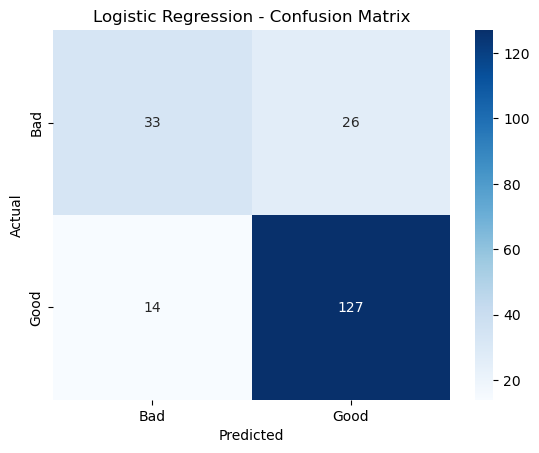

Logistic Regression - Classification Report:

              precision    recall  f1-score   support

           0       0.70      0.56      0.62        59
           1       0.83      0.90      0.86       141

    accuracy                           0.80       200
   macro avg       0.77      0.73      0.74       200
weighted avg       0.79      0.80      0.79       200



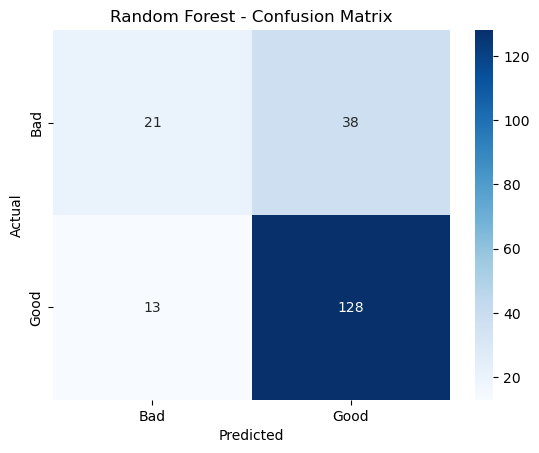

Random Forest - Classification Report:

              precision    recall  f1-score   support

           0       0.62      0.36      0.45        59
           1       0.77      0.91      0.83       141

    accuracy                           0.74       200
   macro avg       0.69      0.63      0.64       200
weighted avg       0.73      0.74      0.72       200



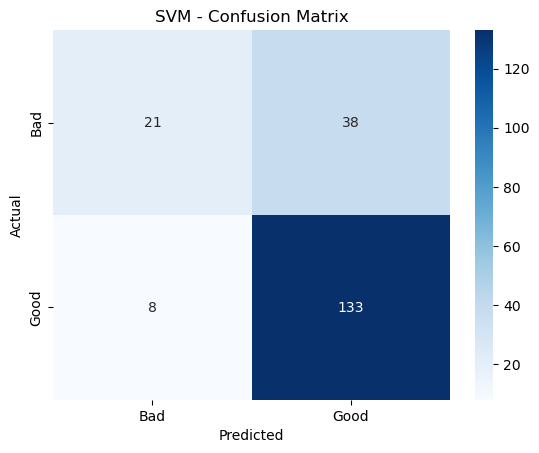

SVM - Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.36      0.48        59
           1       0.78      0.94      0.85       141

    accuracy                           0.77       200
   macro avg       0.75      0.65      0.66       200
weighted avg       0.76      0.77      0.74       200



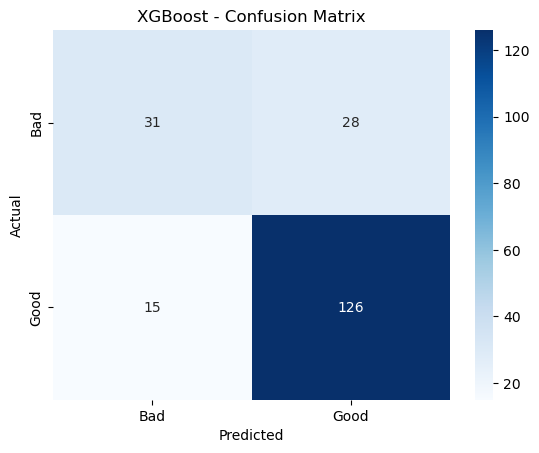

XGBoost - Classification Report:

              precision    recall  f1-score   support

           0       0.67      0.53      0.59        59
           1       0.82      0.89      0.85       141

    accuracy                           0.79       200
   macro avg       0.75      0.71      0.72       200
weighted avg       0.78      0.79      0.78       200



In [52]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define the models
logreg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss')

# Fit models
logreg.fit(X_train_transformed, y_train)
rf.fit(X_train_transformed, y_train)
svm.fit(X_train_transformed, y_train)
xgb_model.fit(X_train_transformed, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test_transformed)
y_pred_rf = rf.predict(X_test_transformed)
y_pred_svm = svm.predict(X_test_transformed)
y_pred_xgb = xgb_model.predict(X_test_transformed)

# Confusion Matrix and Classification Report
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(f"{model_name} - Classification Report:\n")
    print(classification_report(y_true, y_pred))

# Plot and print results for each model
models = [('Logistic Regression', y_pred_logreg), 
          ('Random Forest', y_pred_rf),
          ('SVM', y_pred_svm),
          ('XGBoost', y_pred_xgb)]

for model_name, y_pred in models:
    plot_confusion_matrix(y_test, y_pred, model_name)


# Hyperparameter tuning
We'll start by tuning the hyperparameters for the following models:

Logistic Regression
Random Forest
XGBoost
We'll use the hyperopt library for Bayesian optimization, which provides a way to search for the optimal hyperparameters. 

# Random Forest Tuning

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define a grid of hyperparameters
param_grid = {
    'n_estimators': [100, 200, 500],  # Number of trees
    'max_depth': [None, 10, 20, 30, 40, 50],  # Max depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider
}

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search on the training data
grid_search.fit(X_train_transformed, y_train)

# Get the best hyperparameters and the best model
best_rf = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print("Best Random Forest Hyperparameters:", best_rf)


Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Random Forest Hyperparameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [87]:
from sklearn.metrics import accuracy_score

# Make predictions with the best model
y_pred = best_rf_model.predict(X_test_transformed)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy: {:.4f}".format(accuracy))

Test Set Accuracy: 0.7650


In [93]:
# If you don't have the original feature names
num_features = X_train_transformed.shape[1]
column_names = [f'Feature {i+1}' for i in range(num_features)]

# Convert X_train_transformed back to a DataFrame with placeholder names
X_train_df = pd.DataFrame(X_train_transformed, columns=column_names)

# Now, calculate feature importances
importances = best_rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train_df.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Show the top 10 features
print(feature_importance_df.head(10))


       Feature  Importance
1    Feature 2    0.112827
4    Feature 5    0.096933
0    Feature 1    0.084563
9   Feature 10    0.058876
2    Feature 3    0.041376
3    Feature 4    0.041086
5    Feature 6    0.023266
13  Feature 14    0.022987
46  Feature 47    0.022434
40  Feature 41    0.021990


In [99]:
from sklearn.preprocessing import StandardScaler

# Assuming you've used a scaler on the transformed features
scaler = StandardScaler()

# Apply scaling to the already transformed features (X_train_transformed)
X_train_scaled = scaler.fit_transform(X_train_transformed)

# Convert to DataFrame (with encoded column names)
X_train_df = pd.DataFrame(X_train_scaled, columns=encoded_columns[:X_train_scaled.shape[1]])

# Calculate feature importances
importances = best_rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train_df.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Show the top 10 features
print(feature_importance_df.head(10))


           Feature  Importance
1   Attribute1_A12    0.112827
4     Attribute2_4    0.096933
0   Attribute1_A11    0.084563
9     Attribute2_9    0.058876
2   Attribute1_A13    0.041376
3   Attribute1_A14    0.041086
5     Attribute2_5    0.023266
13   Attribute2_13    0.022987
46  Attribute4_A44    0.022434
40  Attribute3_A34    0.021990


# XGBoost tuning

In [103]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinking
    'max_depth': [3, 5, 7, 9],  # Maximum depth of trees
    'subsample': [0.6, 0.8, 1.0],  # Subsample ratio
    'colsample_bytree': [0.6, 0.8, 1.0],  # Feature sampling ratio
    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction
    'min_child_weight': [1, 2, 3]  # Minimum sum of instance weight in child
}


In [105]:
xgb_model = xgb.XGBClassifier(random_state=42)


In [107]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring=make_scorer(accuracy_score))


In [109]:
# Fit the grid search to the training data
grid_search.fit(X_train_transformed, y_train)

# Print the best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)


Fitting 5 folds for each of 2916 candidates, totalling 14580 fits
Best hyperparameters found:  {'colsample_bytree': 0.6, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 1.0}


In [111]:
# Get the best model from the grid search
best_xgb_model = grid_search.best_estimator_

# Test set accuracy
test_accuracy = best_xgb_model.score(X_test_transformed, y_test)
print(f'Test Set Accuracy: {test_accuracy}')


Test Set Accuracy: 0.77


In [113]:
# Get the cross-validation results
cv_results = grid_search.cv_results_

# Print the best mean test score and corresponding parameters
print(f"Best mean CV score: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")

# Get the top 5 results
top_results = pd.DataFrame(cv_results).sort_values(by='mean_test_score', ascending=False).head(5)
print(top_results[['mean_test_score', 'params']])


Best mean CV score: 0.7625
Best parameters: {'colsample_bytree': 0.6, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 1.0}
      mean_test_score                                             params
536           0.76250  {'colsample_bytree': 0.6, 'gamma': 0.1, 'learn...
860           0.76000  {'colsample_bytree': 0.6, 'gamma': 0.2, 'learn...
908           0.75750  {'colsample_bytree': 0.6, 'gamma': 0.2, 'learn...
567           0.75625  {'colsample_bytree': 0.6, 'gamma': 0.1, 'learn...
1234          0.75625  {'colsample_bytree': 0.8, 'gamma': 0, 'learnin...


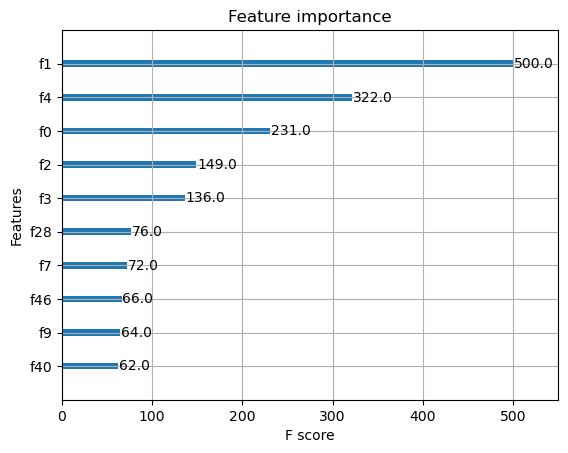

In [115]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Plot feature importances
xgb.plot_importance(best_xgb_model, max_num_features=10)
plt.show()


In [117]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on the test set
y_pred = best_xgb_model.predict(X_test_transformed)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[ 24  35]
 [ 11 130]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.41      0.51        59
           1       0.79      0.92      0.85       141

    accuracy                           0.77       200
   macro avg       0.74      0.66      0.68       200
weighted avg       0.76      0.77      0.75       200



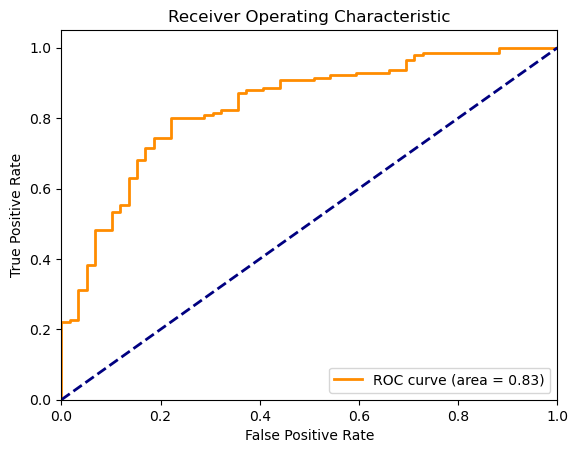

In [119]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, best_xgb_model.predict_proba(X_test_transformed)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# LogisticRegression Tuning

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the Logistic Regression model
logreg = LogisticRegression()

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
    'penalty': ['l2'],  # Typically use L2 penalty for Logistic Regression
    'solver': ['lbfgs', 'liblinear', 'saga'],  # Common solvers
    'max_iter': [100, 200, 300]  # Maximum iterations
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_transformed, y_train)

# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best Cross-validation Accuracy:", best_score)

# Evaluate on the test set
test_accuracy = grid_search.score(X_test_transformed, y_test)
print("Test Set Accuracy:", test_accuracy)


Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Hyperparameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-validation Accuracy: 0.74
Test Set Accuracy: 0.8


In [134]:
# Print the features selected for the model (non-zero coefficients)
selected_features = [col for col, coef in zip(encoded_columns, coeffs) if coef != 0]
print(f"Number of selected features: {len(selected_features)}")
print(f"Selected features: {selected_features[:10]}")  # Print first 10 selected features


Number of selected features: 48
Selected features: ['Attribute1_A11', 'Attribute1_A12', 'Attribute1_A13', 'Attribute1_A14', 'Attribute2_4', 'Attribute2_5', 'Attribute2_6', 'Attribute2_7', 'Attribute2_8', 'Attribute2_9']


In [138]:
# Create the DataFrame with the selected features and their coefficients
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': coeffs
}).sort_values(by='Coefficient', ascending=False)

# Display the top 10 important features
print(feature_importance_df.head(10))


           Feature  Coefficient
9     Attribute2_9     1.495368
14   Attribute2_14     1.303757
13   Attribute2_13     1.121233
8     Attribute2_8     0.850997
47  Attribute4_A45     0.848930
21   Attribute2_24     0.803366
17   Attribute2_18     0.777520
25   Attribute2_30     0.774791
16   Attribute2_16     0.720130
32   Attribute2_47     0.715128


<Figure size 1000x600 with 0 Axes>

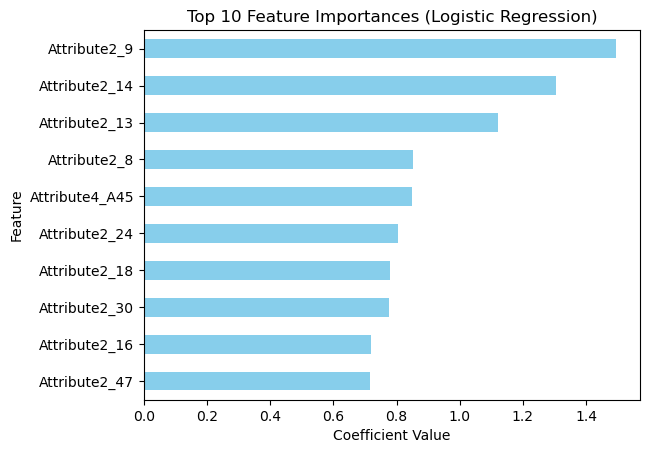

In [140]:
import matplotlib.pyplot as plt

# Plot the top 10 features
plt.figure(figsize=(10, 6))
feature_importance_df.head(10).plot(kind='barh', x='Feature', y='Coefficient', legend=False, color='skyblue')
plt.title('Top 10 Feature Importances (Logistic Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()


# Lets Apply and test our Best Models


In [153]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Assuming X and y have been loaded (X = features, y = target)

# 1. Check if y is a DataFrame and extract the 'class' column
if isinstance(y, pd.DataFrame):
    y = y['class']  # Extract target variable

# 2. Convert target to binary (1 = Good Credit, 0 = Bad Credit)
y_binary = y.map({1: 1, 2: 0})

# 3. Define categorical and numerical columns
categorical_columns = [
    'Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 
    'Attribute9', 'Attribute10', 'Attribute12', 'Attribute14', 'Attribute15', 
    'Attribute17', 'Attribute19', 'Attribute20'
]

numerical_columns = [
    'Attribute2', 'Attribute5', 'Attribute8', 'Attribute11', 'Attribute13', 
    'Attribute16', 'Attribute18'
]

# 4. Split the dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# 5. Create a preprocessor for scaling numerical columns and encoding categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Scaling numerical columns
        ('cat', OneHotEncoder(drop='first'), categorical_columns)  # One-hot encoding for categorical columns
    ])

# 6. Apply the preprocessing pipeline to the data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Check the shapes of the transformed data
print("Transformed X_train shape:", X_train_transformed.shape)
print("Transformed X_test shape:", X_test_transformed.shape)


Transformed X_train shape: (800, 48)
Transformed X_test shape: (200, 48)


In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Best Random Forest hyperparameters found earlier
best_rf_model = RandomForestClassifier(
    max_depth=None,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

# 1. Train the Random Forest model
best_rf_model.fit(X_train_transformed, y_train)

# 2. Predict on the test set
y_pred_rf = best_rf_model.predict(X_test_transformed)

# 3. Evaluate the model
print(f"Random Forest Test Set Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Test Set Accuracy: 0.765
Random Forest Confusion Matrix:
 [[ 21  38]
 [  9 132]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.36      0.47        59
           1       0.78      0.94      0.85       141

    accuracy                           0.77       200
   macro avg       0.74      0.65      0.66       200
weighted avg       0.75      0.77      0.74       200



In [157]:
import xgboost as xgb

# Best XGBoost hyperparameters found earlier
best_xgb_model = xgb.XGBClassifier(
    colsample_bytree=0.6,
    gamma=0.1,
    learning_rate=0.05,
    max_depth=9,
    min_child_weight=3,
    n_estimators=100,
    subsample=1.0,
    random_state=42
)

# 1. Train the XGBoost model
best_xgb_model.fit(X_train_transformed, y_train)

# 2. Predict on the test set
y_pred_xgb = best_xgb_model.predict(X_test_transformed)

# 3. Evaluate the model
print(f"XGBoost Test Set Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Test Set Accuracy: 0.77
XGBoost Confusion Matrix:
 [[ 24  35]
 [ 11 130]]
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.41      0.51        59
           1       0.79      0.92      0.85       141

    accuracy                           0.77       200
   macro avg       0.74      0.66      0.68       200
weighted avg       0.76      0.77      0.75       200



In [159]:
from sklearn.linear_model import LogisticRegression

# Best Logistic Regression hyperparameters found earlier
best_logreg_model = LogisticRegression(
    C=1,
    max_iter=100,
    penalty='l2',
    solver='lbfgs',
    random_state=42
)

# 1. Train the Logistic Regression model
best_logreg_model.fit(X_train_transformed, y_train)

# 2. Predict on the test set
y_pred_logreg = best_logreg_model.predict(X_test_transformed)

# 3. Evaluate the model
print(f"Logistic Regression Test Set Accuracy: {accuracy_score(y_test, y_pred_logreg)}")
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))


Logistic Regression Test Set Accuracy: 0.8
Logistic Regression Confusion Matrix:
 [[ 33  26]
 [ 14 127]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.56      0.62        59
           1       0.83      0.90      0.86       141

    accuracy                           0.80       200
   macro avg       0.77      0.73      0.74       200
weighted avg       0.79      0.80      0.79       200



In [161]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Predicted Bad Credit', 'Predicted Good Credit'],
                yticklabels=['Actual Bad Credit', 'Actual Good Credit'])
    
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


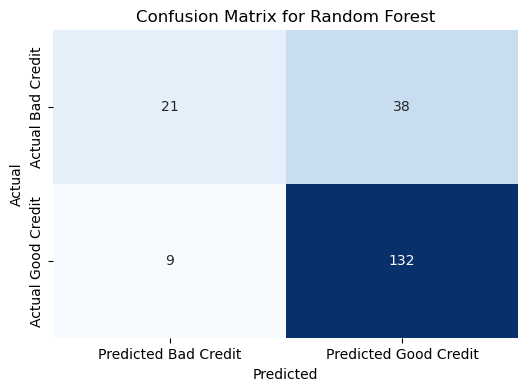

In [163]:
plot_confusion_matrix(y_test, y_pred_rf, model_name='Random Forest')


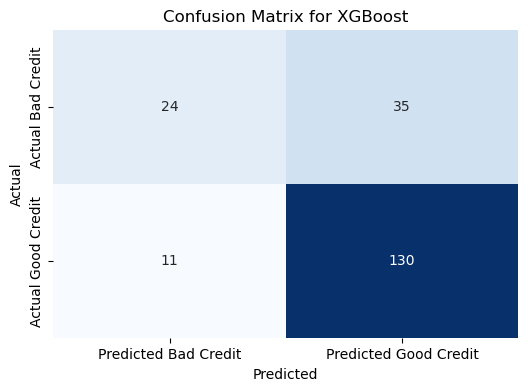

In [165]:
plot_confusion_matrix(y_test, y_pred_xgb, model_name='XGBoost')


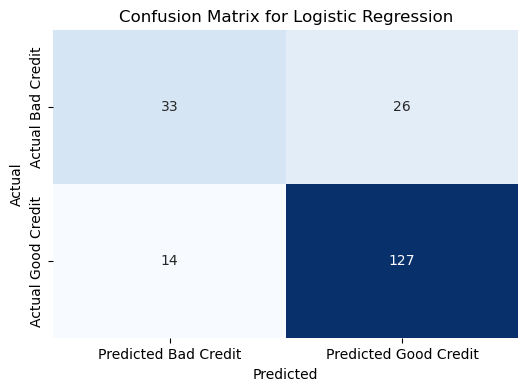

In [167]:
plot_confusion_matrix(y_test, y_pred_logreg, model_name='Logistic Regression')


Number of selected features: 48
Selected features: ['Attribute1_A12', 'Attribute1_A13', 'Attribute1_A14', 'Attribute2_5', 'Attribute2_6', 'Attribute2_7', 'Attribute2_8', 'Attribute2_9', 'Attribute2_10', 'Attribute2_11']
           Feature  Coefficient
9    Attribute2_11     1.495368
14   Attribute2_16     1.303757
13   Attribute2_15     1.121233
8    Attribute2_10     0.850997
47  Attribute5_338     0.848930
21   Attribute2_27     0.803366
17   Attribute2_21     0.777520
25   Attribute2_36     0.774791
16   Attribute2_20     0.720130
32   Attribute2_54     0.715128


<Figure size 1000x600 with 0 Axes>

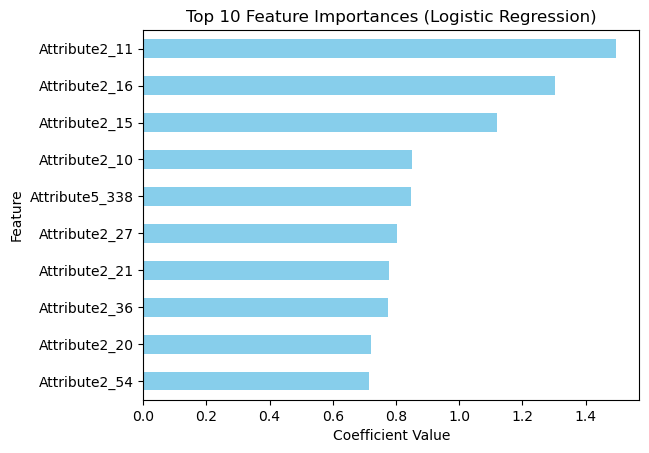

In [173]:
# Print the features selected for the model (non-zero coefficients)
selected_features = [col for col, coef in zip(encoded_columns, coeffs) if coef != 0]
print(f"Number of selected features: {len(selected_features)}")
print(f"Selected features: {selected_features[:10]}")  # Print first 10 selected features

# Create the DataFrame with the selected features and their coefficients
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': coeffs
}).sort_values(by='Coefficient', ascending=False)

# Display the top 10 important features
print(feature_importance_df.head(10))

import matplotlib.pyplot as plt

# Plot the top 10 features
plt.figure(figsize=(10, 6))
feature_importance_df.head(10).plot(kind='barh', x='Feature', y='Coefficient', legend=False, color='skyblue')
plt.title('Top 10 Feature Importances (Logistic Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()


In [179]:
# Assuming you have the encoder already fitted to the training data (X_train)
encoded_columns = encoder.get_feature_names_out(input_features=X_train.columns)

# Get the category mappings
category_mappings = dict(zip(X_train.columns, encoder.categories_))

# Print out the mappings for the columns involved in the encoding
for col, categories in category_mappings.items():
    print(f"Feature: {col} -> Categories: {categories}")


Feature: Attribute1 -> Categories: ['A11' 'A12' 'A13' 'A14']
Feature: Attribute2 -> Categories: [ 4  5  6  7  8  9 10 11 12 13 14 15 16 18 20 21 22 24 26 27 28 30 33 36
 39 40 42 45 47 48 54 60]
Feature: Attribute3 -> Categories: ['A30' 'A31' 'A32' 'A33' 'A34']
Feature: Attribute4 -> Categories: ['A40' 'A41' 'A410' 'A42' 'A43' 'A44' 'A45' 'A46' 'A48' 'A49']
Feature: Attribute5 -> Categories: [  250   338   339   343   362   392   409   426   428   433   448   454
   522   571   590   609   618   625   629   639   640   652   654   666
   672   674   682   683   685   691   697   700   701   707   708   709
   717   719   727   730   741   750   753   754   759   760   763   776
   781   790   795   797   802   804   806   836   841   860   866   874
   886   894   900   902   909   915   930   932   936   937   939   947
   950   951   958   960   975   976   983   996   999  1028  1037  1038
  1042  1047  1049  1050  1053  1055  1056  1068  1076  1082  1092  1103
  1107  1108  1113  1